In [1]:
!pip install pymysql
!pip install plotly

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pymysql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
# Database Connection :
conn=pymysql.connect(host="localhost",
                user="root",
                password="ankita@12345",
                db="amazon")
conn

In [4]:
sql_query="select * from amazon;"
df=pd.read_sql(sql_query,conn)
df.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_9740\1689056569.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql(sql_query,conn)


Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total  \
0       Health and beauty       74.69         7  26.1415  548.9715   
1  Electronic accessories       15.28         5   3.8200   80.2200   
2      Home and lifestyle       46.33         7  16.2155  340.5255   
3       Health and beauty       58.22         8  23.2880  489.0480   
4       Sports and travel       86.31         7  30.2085  634.3785   

         Date monthname   dayname      Time  timeofday      Payment    cogs  \
0  05-01-2019   January  Saturday  13:08:00  Afternoon      Ewallet  522.83   
1  08-03-2019     March    Friday  10:29:00    Morning         Cash   76.40   
2  03-03-2019     March    Sunday  13:23:00  Afternoon  Credit card  324.31   
3  27-01-2019   January    Sunday  20:33:00    Evening      Ewallet  465.76   
4  08-02-2019  February    Friday  10:37:00    Morning      Ewallet  604.17   

   gross margin percentage  gross income  Rating  
0                 4.761905       26.1415     9.1  
1                 4.761905        3.8200     9.6  
2                 4.761905       16.2155     7.4  
3                 4.761905       23.2880     8.4  
4                 4.761905       30.2085     5.3

In [5]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'monthname', 'dayname', 'Time', 'timeofday', 'Payment', 'cogs',
       'gross margin percentage', 'gross income', 'Rating'],
      dtype='object')

In [6]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'monthname', 'dayname', 'Time', 'timeofday', 'Payment', 'cogs',
       'gross margin percentage', 'gross income', 'Rating'],
      dtype='object')

In [7]:
df.shape

(1000, 20)

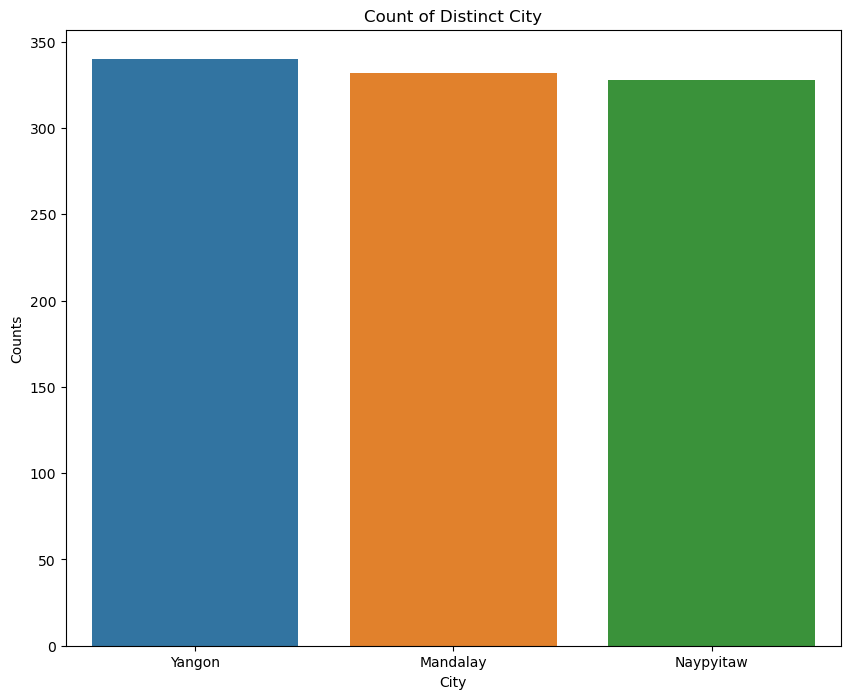

In [8]:
#1> What is the count of distinct cities in the dataset?
sql="select count(distinct(City) as distinct_city from amazon;"
plt.figure(figsize=(10,8))
sns.countplot(x='City',data=df,order=df['City'].value_counts().index)
plt.title('Count of Distinct City')
plt.xlabel('City')
plt.ylabel('Counts')
plt.show()

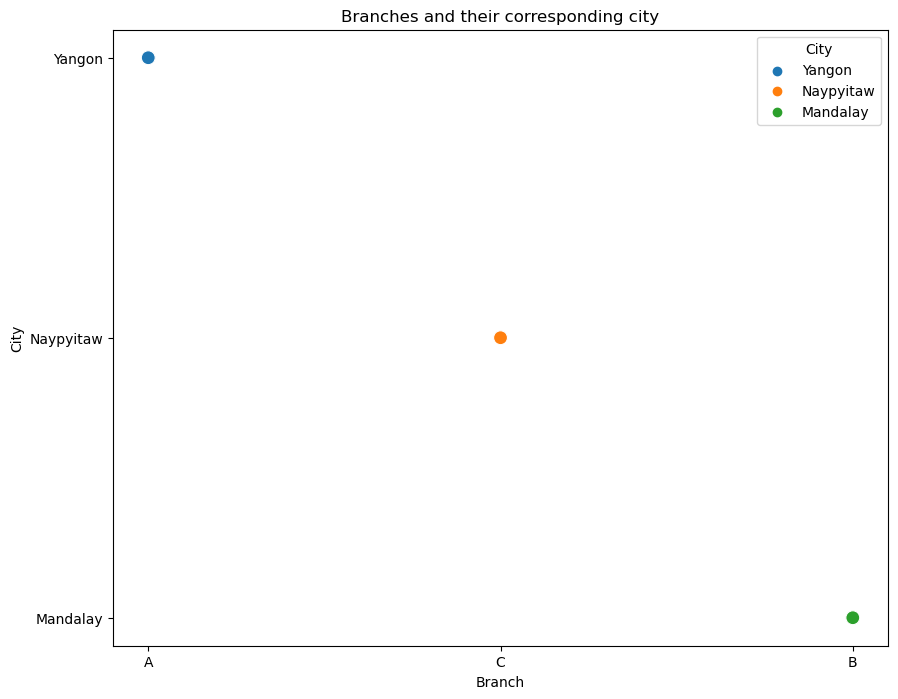

In [9]:
#2> For each branch, what is the corresponding city?
plt.figure(figsize=(10,8))
sns.scatterplot(x='Branch',y='City',data=df,hue='City',s=100)
plt.title('Branches and their corresponding city')
plt.xlabel('Branch')
plt.ylabel('City')
plt.show()

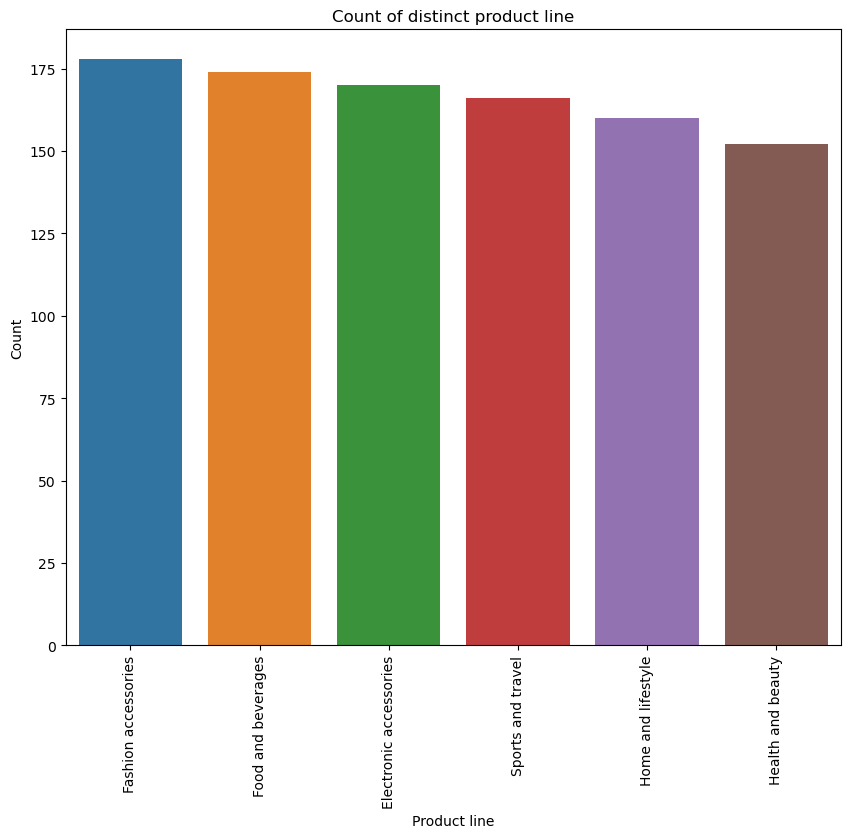

In [10]:
#3> What is the count of distinct product lines in the dataset?
plt.figure(figsize=(10,8))
sns.countplot(x='Product line',data=df,order=df['Product line'].value_counts().index)
plt.title('Count of distinct product line')
plt.xlabel('Product line')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

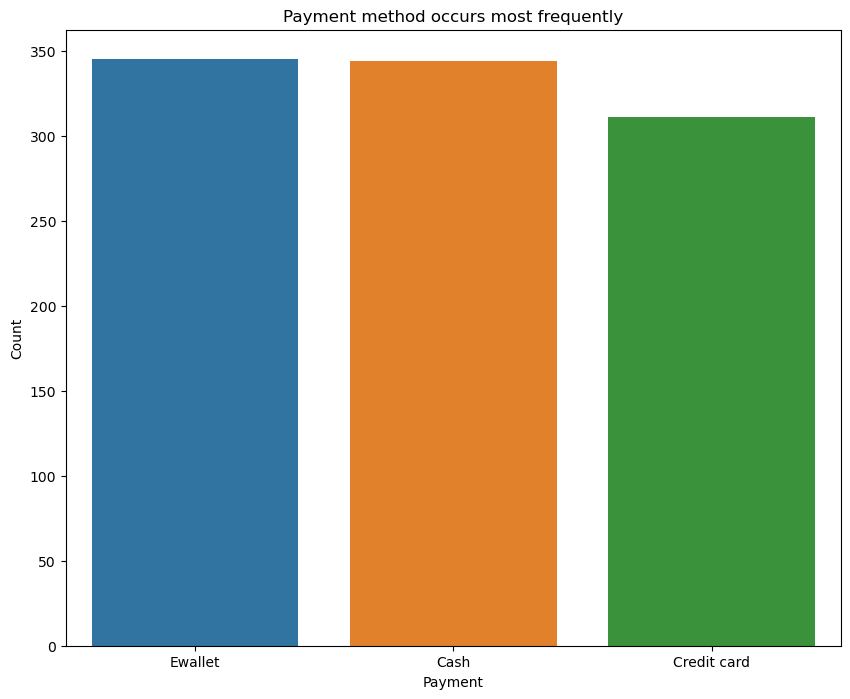

In [11]:
# 4>Which payment method occurs most frequently?
plt.figure(figsize=(10,8))
sns.countplot(x='Payment',data=df)
plt.title('Payment method occurs most frequently')
plt.xlabel('Payment')
plt.ylabel('Count')
plt.show()

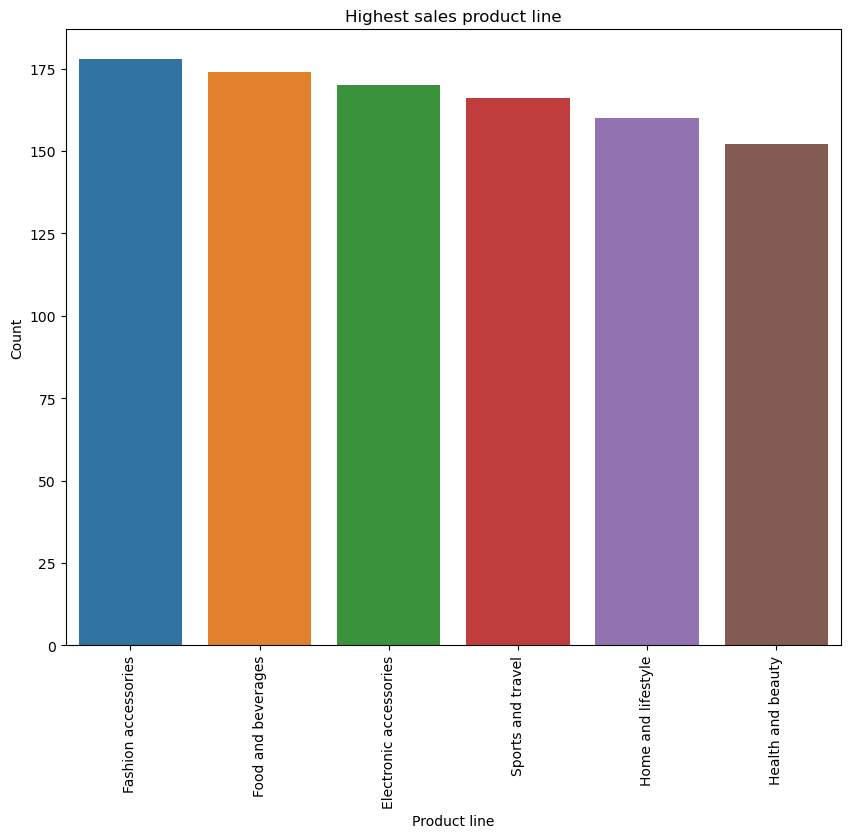

In [12]:
#5> Which product line has the highest sales?
plt.figure(figsize=(10,8))
sns.countplot(x='Product line',data=df,order=df['Product line'].value_counts().index)
plt.title('Highest sales product line')
plt.xlabel('Product line')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

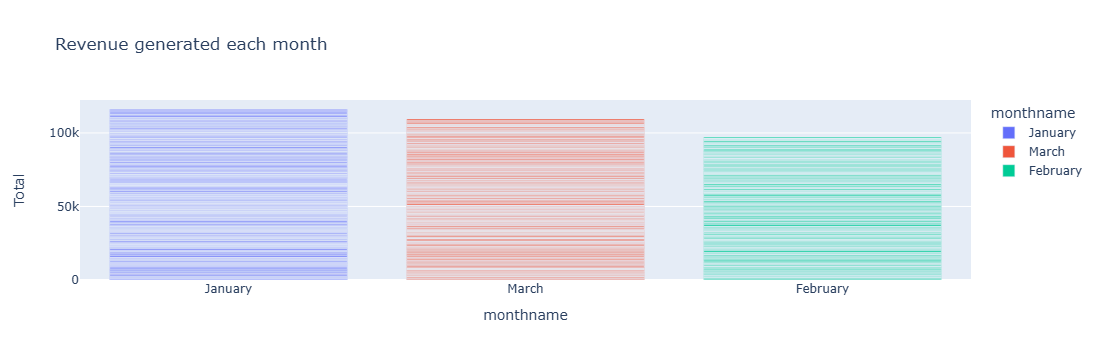

In [13]:
# 6>How much revenue is generated each month?
fig=px.bar(df,x='monthname',y='Total',title='Revenue generated each month',color='monthname')
fig.show()

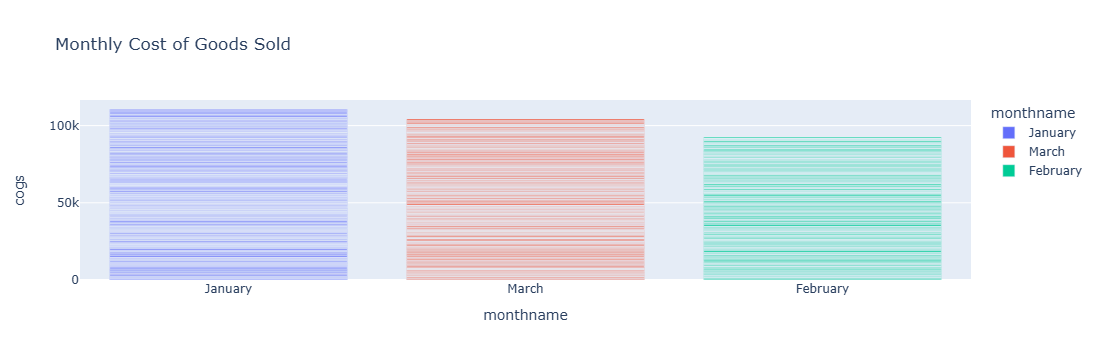

In [14]:
# 7>In which month did the cost of goods sold reach its peak?
fig = px.bar(df, x='monthname', y='cogs', title='Monthly Cost of Goods Sold',color='monthname')
fig.show()

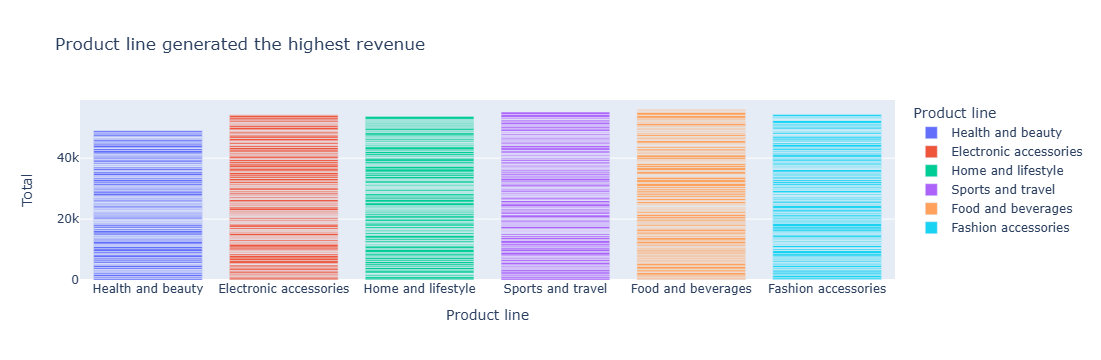

In [15]:
#8> Which product line generated the highest revenue?
fig=px.bar(df,x='Product line',y='Total',title='Product line generated the highest revenue',color='Product line')
fig.show()

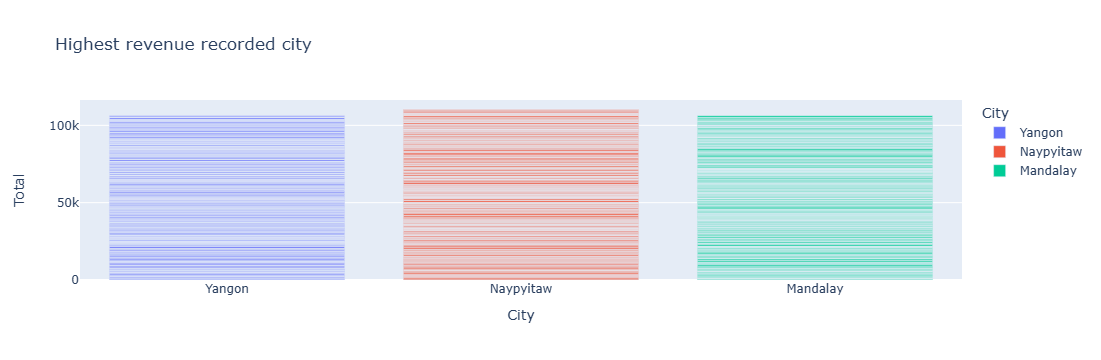

In [16]:
# 9>In which city was the highest revenue recorded?
fig=px.bar(df,x='City',y='Total',title='Highest revenue recorded city',color='City')
fig.show()

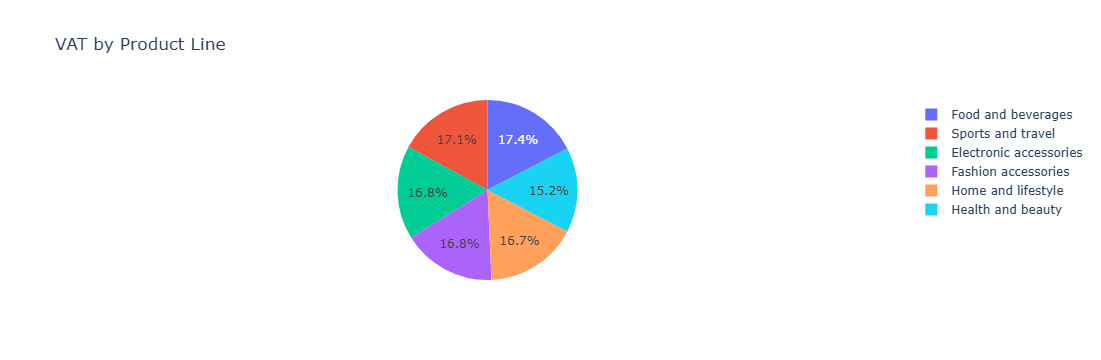

In [17]:
# 10>Which product line incurred the highest Value Added Tax?
fig = px.pie(df, values='Tax 5%', names='Product line', title='VAT by Product Line')
fig.show()

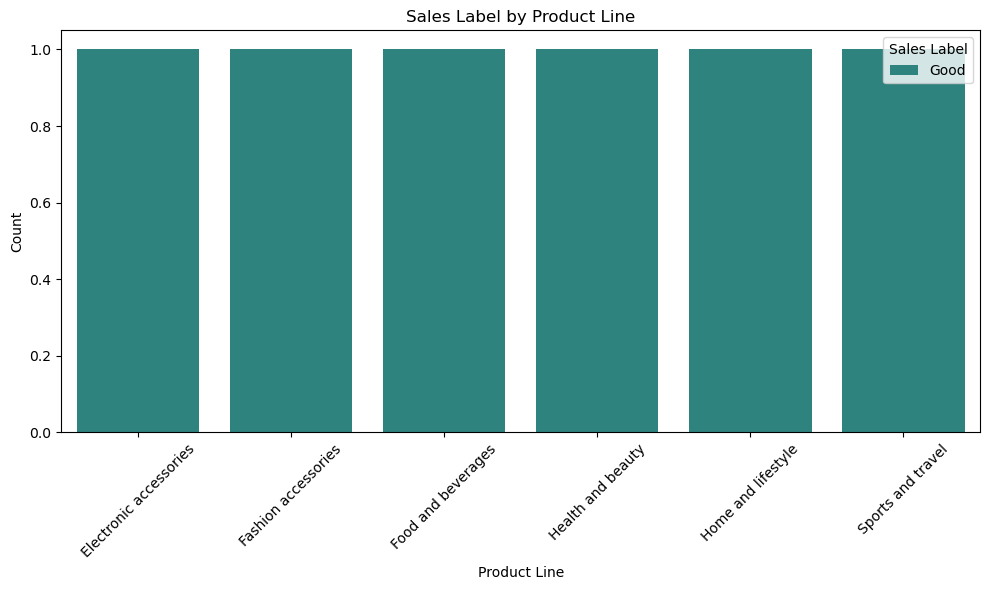

In [18]:
# 11>For each product line, add a column indicating "Good" if its sales are above average, otherwise "Bad."
# select `Product line`,sum(Total) as total_sale,case when sum(Total)>(select avg(Total) from amazon) then 'Good'
# else 'Bad'
# end as product_quality from amazon
# group by `Product line`
# order by total_sale desc;
avg_sales = df['Total'].mean()
total_sales_by_product = df.groupby('Product line')['Total'].sum().reset_index()
total_sales_by_product['Sales Label'] = np.where(total_sales_by_product['Total'] > avg_sales, 'Good', 'Bad')
plt.figure(figsize=(10, 6))
sns.countplot(x='Product line', hue='Sales Label', data=total_sales_by_product, palette='viridis')
plt.title('Sales Label by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sales Label')
plt.tight_layout()
plt.savefig('sales.png')
plt.show()

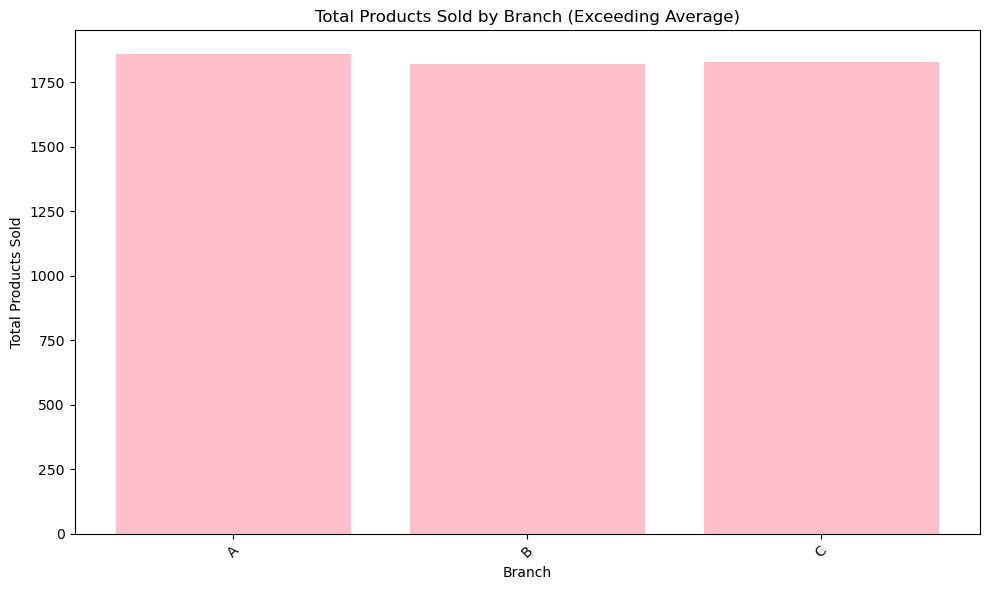

In [19]:
#12> Identify the branch that exceeded the average number of products sold.
avg_quantity = df['Quantity'].mean()
exceeded = df.groupby('Branch')['Quantity'].sum().reset_index()
exceeded_branches = exceeded[exceeded['Quantity'] > avg_quantity] 

plt.figure(figsize=(10, 6))
plt.bar(exceeded_branches['Branch'], exceeded_branches['Quantity'], color='pink')
plt.title('Total Products Sold by Branch (Exceeding Average)')
plt.xlabel('Branch')
plt.ylabel('Total Products Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



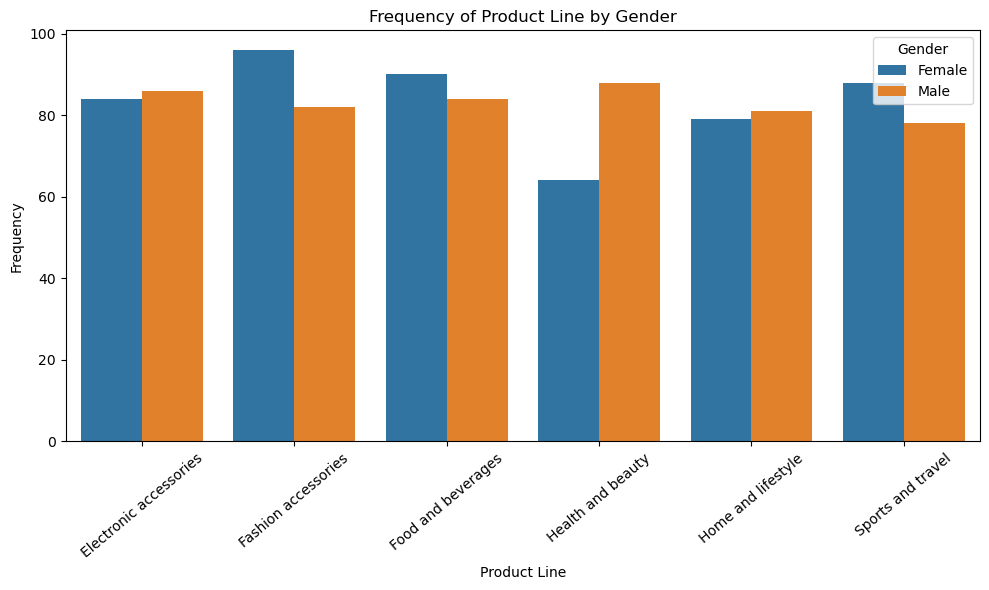

In [20]:
# 13>Which product line is most frequently associated with each gender?
frequency = df.groupby(['Product line', 'Gender']).size().reset_index(name='Frequency')
plt.figure(figsize=(10, 6))
sns.barplot(x='Product line', y='Frequency', hue='Gender', data=frequency)
plt.title('Frequency of Product Line by Gender')
plt.xlabel('Product Line')
plt.ylabel('Frequency')
plt.xticks(rotation=40)
plt.legend(title='Gender')
plt.tight_layout()
plt.savefig('frequency_product_line_by_gender.png')
plt.show()

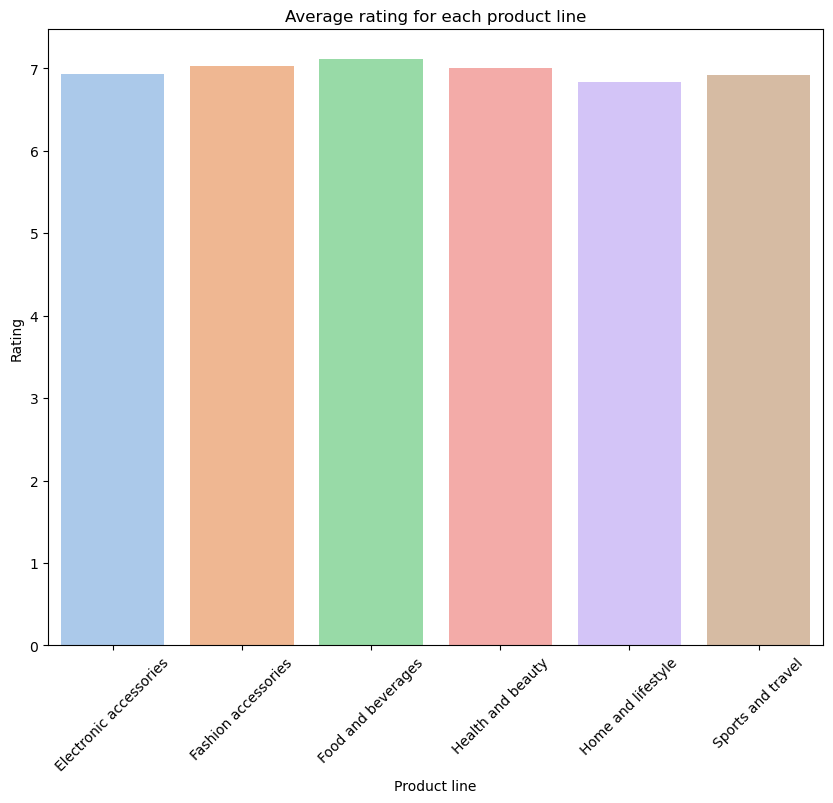

In [21]:
# 14>Calculate the average rating for each product line.
# select `Product line`,avg(Rating) as avg_rating from amazon
# group by `Product line`
# order by avg_rating desc;
rating_by_product_line=df.groupby('Product line')['Rating'].mean().reset_index()
plt.figure(figsize=(10,8))
sns.barplot(x='Product line',y='Rating',data=rating_by_product_line,palette='pastel')
plt.title('Average rating for each product line')
plt.xlabel('Product line')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_9740\1187236690.py:6: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



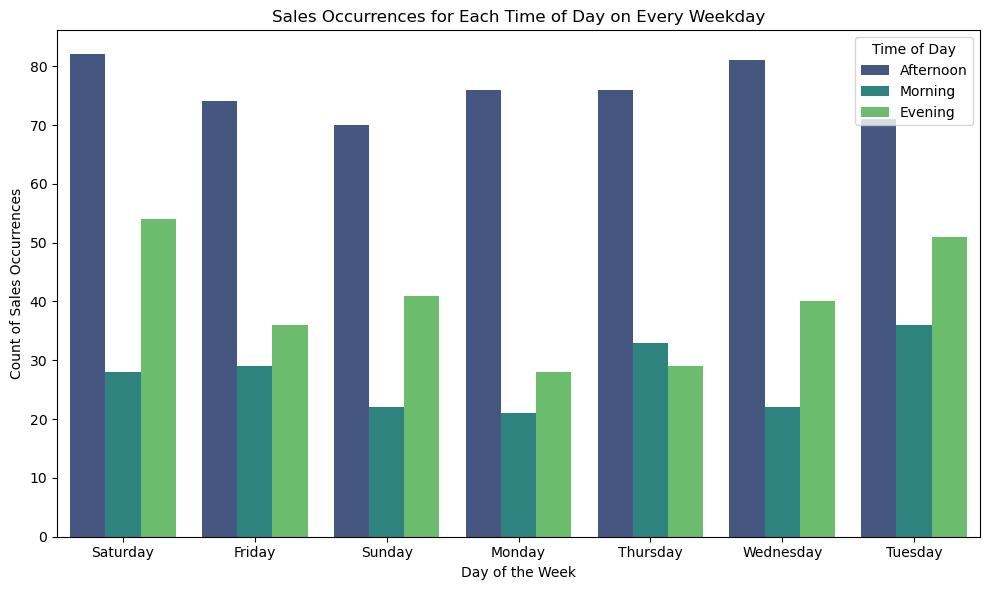

In [22]:
# 15>Count the sales occurrences for each time of day on every weekday.
# select timeofday,dayname,count(*) as sales_occures from amazon
# where dayname in ('Monday','Tuesday','Wednesday','Thursday','Friday')
# group by timeofday,dayname
# order by sales_occures desc;
df['Time'] = pd.to_datetime(df['Time'])

# Extract the hour and the weekday
df['Hour'] = df['Time'].dt.hour
df['Weekday'] = df['Time'].dt.day_name()
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
df_weekdays = df[df['Weekday'].isin(weekdays)]

plt.figure(figsize=(10,6))
sns.countplot(x='dayname', hue='timeofday', data=df_weekdays, palette='viridis')
plt.title('Sales Occurrences for Each Time of Day on Every Weekday')
plt.xlabel('Day of the Week')
plt.ylabel('Count of Sales Occurrences')
plt.legend(title='Time of Day')
plt.tight_layout()
plt.savefig('sales_occurences.png')
plt.show()


In [23]:
df.head()

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total  ...  \
0       Health and beauty       74.69         7  26.1415  548.9715  ...   
1  Electronic accessories       15.28         5   3.8200   80.2200  ...   
2      Home and lifestyle       46.33         7  16.2155  340.5255  ...   
3       Health and beauty       58.22         8  23.2880  489.0480  ...   
4       Sports and travel       86.31         7  30.2085  634.3785  ...   

    dayname                Time  timeofday      Payment    cogs  \
0  Saturday 2024-05-24 13:08:00  Afternoon      Ewallet  522.83   
1    Friday 2024-05-24 10:29:00    Morning         Cash   76.40   
2    Sunday 2024-05-24 13:23:00  Afternoon  Credit card  324.31   
3    Sunday 2024-05-24 20:33:00    Evening      Ewallet  465.76   
4    Friday 2024-05-24 10:37:00    Morning      Ewallet  604.17   

  gross margin percentage  gross income  Rating  Hour  Weekday  
0                4.761905       26.1415     9.1    13   Friday  
1                4.761905        3.8200     9.6    10   Friday  
2                4.761905       16.2155     7.4    13   Friday  
3                4.761905       23.2880     8.4    20   Friday  
4                4.761905       30.2085     5.3    10   Friday  

[5 rows x 22 columns]

C:\Users\HP\AppData\Local\Temp\ipykernel_9740\2125438095.py:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




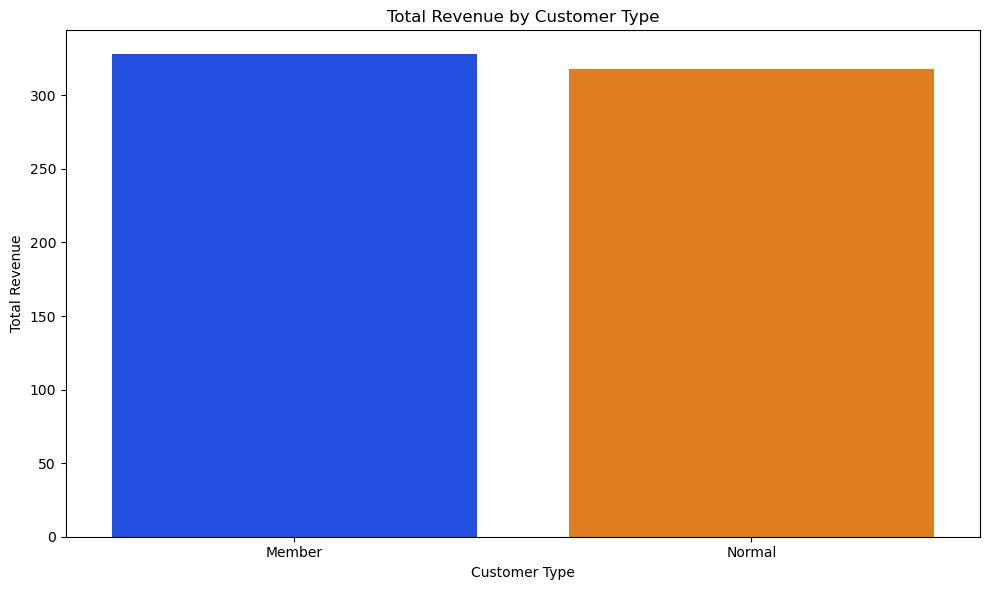

In [24]:
# 16>Identify the customer type contributing the highest revenue.
plt.figure(figsize=(10, 6))
sns.barplot(x='Customer type', y='Total', data=df, palette='bright',ci=None)
plt.title('Total Revenue by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.show()

In [47]:
df.head()

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total  ...  \
0       Health and beauty       74.69         7  26.1415  548.9715  ...   
1  Electronic accessories       15.28         5   3.8200   80.2200  ...   
2      Home and lifestyle       46.33         7  16.2155  340.5255  ...   
3       Health and beauty       58.22         8  23.2880  489.0480  ...   
4       Sports and travel       86.31         7  30.2085  634.3785  ...   

    dayname                Time  timeofday      Payment    cogs  \
0  Saturday 2024-05-24 13:08:00  Afternoon      Ewallet  522.83   
1    Friday 2024-05-24 10:29:00    Morning         Cash   76.40   
2    Sunday 2024-05-24 13:23:00  Afternoon  Credit card  324.31   
3    Sunday 2024-05-24 20:33:00    Evening      Ewallet  465.76   
4    Friday 2024-05-24 10:37:00    Morning      Ewallet  604.17   

  gross margin percentage  gross income  Rating  Hour  Weekday  
0                4.761905       26.1415     9.1    13   Friday  
1                4.761905        3.8200     9.6    10   Friday  
2                4.761905       16.2155     7.4    13   Friday  
3                4.761905       23.2880     8.4    20   Friday  
4                4.761905       30.2085     5.3    10   Friday  

[5 rows x 22 columns]

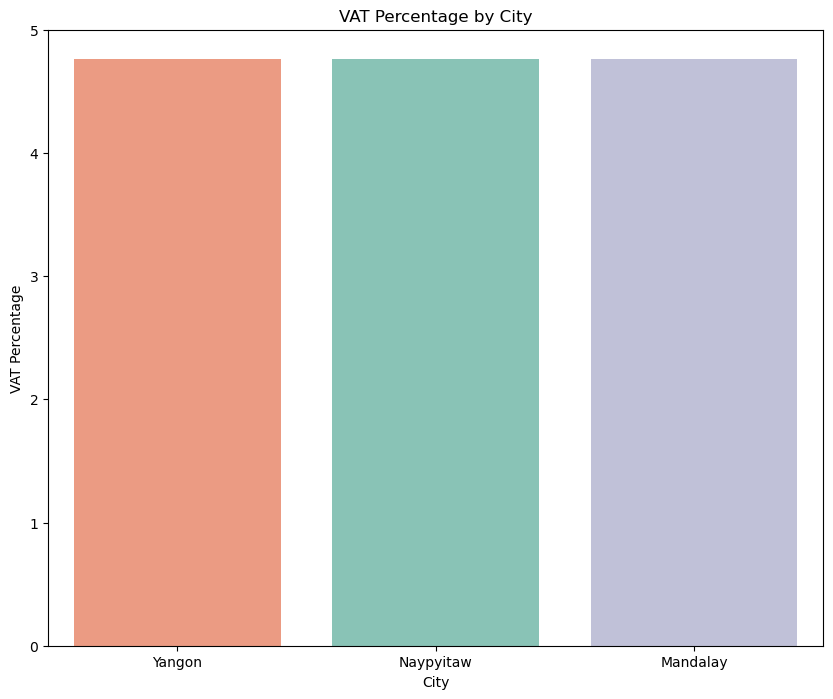

In [51]:
# 17>Determine the city with the highest VAT percentage.
df1['VAT Percentage'] = (df1['Tax 5%'] / df1['Total']) * 100
plt.figure(figsize=(10, 8))
sns.barplot(x='City', y='VAT Percentage', data=df1,palette=["#fc9272","#7fcdbb","#bcbddc"])
plt.xlabel('City')
plt.ylabel('VAT Percentage')
plt.title('VAT Percentage by City')
plt.savefig('vat.png')
plt.show()

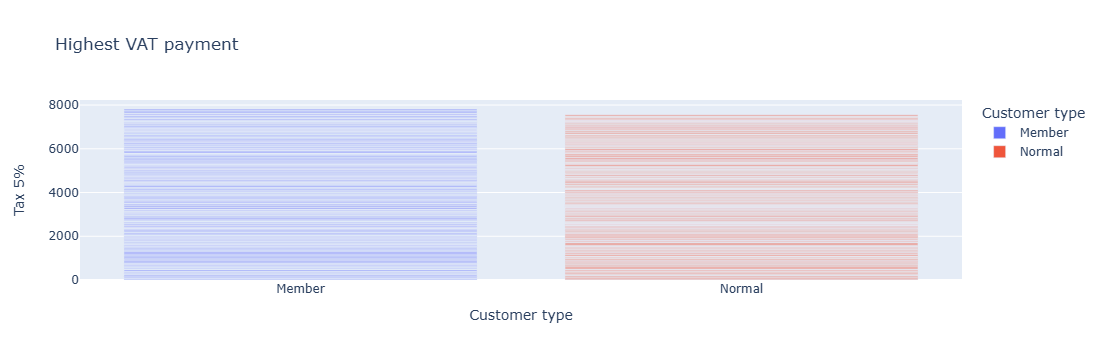

In [27]:
# 18>Identify the customer type with the highest VAT payments.
fig = px.bar(df, x='Customer type', y='Tax 5%', title='Highest VAT payment', color='Customer type')
fig.show()

<Axes: xlabel='Customer type', ylabel='count'>

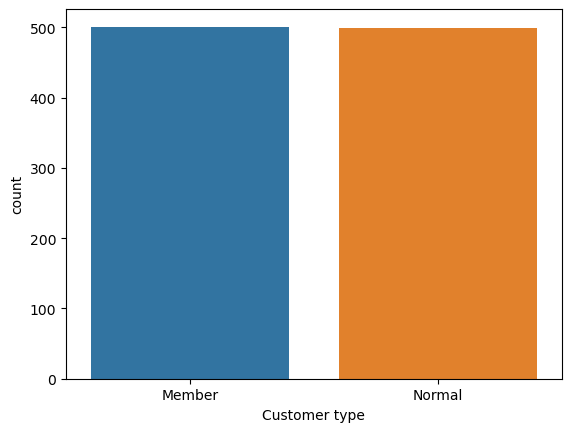

In [28]:
# 19>What is the count of distinct customer types in the dataset?
sns.countplot(data=df,x='Customer type')

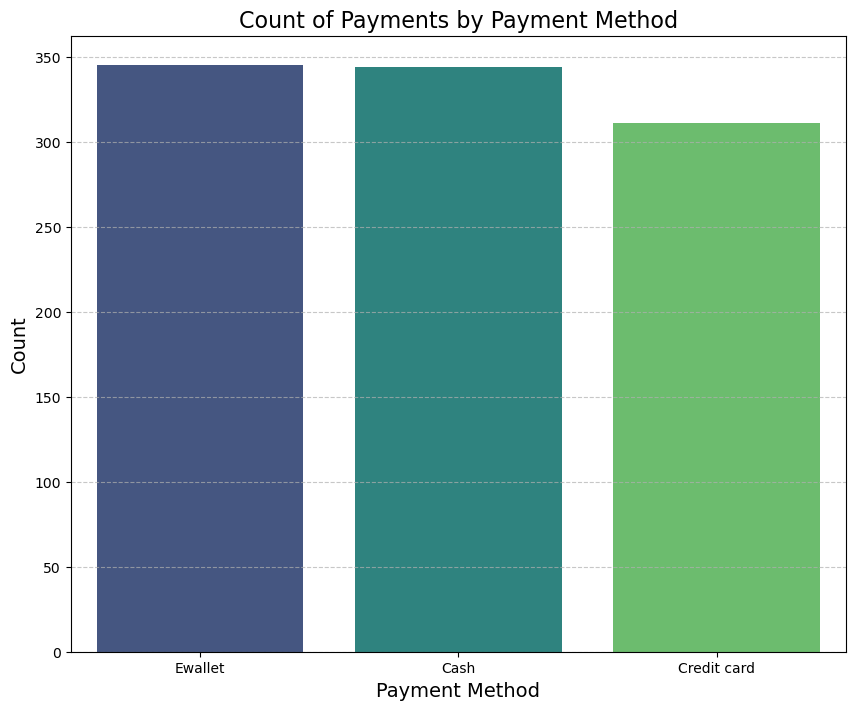

In [29]:
# 20>What is the count of distinct payment methods in the dataset?
plt.figure(figsize=(10, 8))
sns.countplot(data=df,x='Payment',palette='viridis')
plt.title('Count of Payments by Payment Method', fontsize=16)
plt.xlabel('Payment Method', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

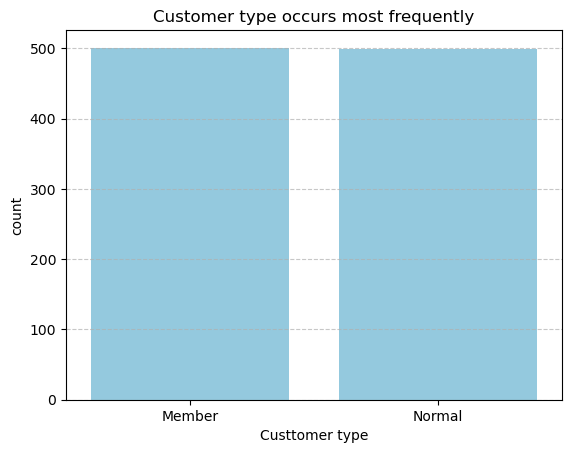

In [30]:
# 21>Which customer type occurs most frequently?
sns.countplot(data=df,x='Customer type',color='skyblue')
plt.title('Customer type occurs most frequently')
plt.xlabel('Custtomer type')
plt.ylabel('count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


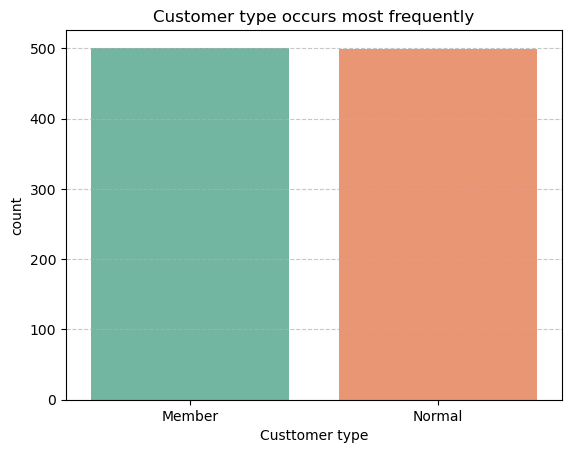

In [31]:
# 22>Identify the customer type with the highest purchase frequency.
sns.countplot(data=df,x='Customer type',palette='Set2')
plt.title('Customer type occurs most frequently')
plt.xlabel('Custtomer type')
plt.ylabel('count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<Axes: xlabel='Gender', ylabel='count'>

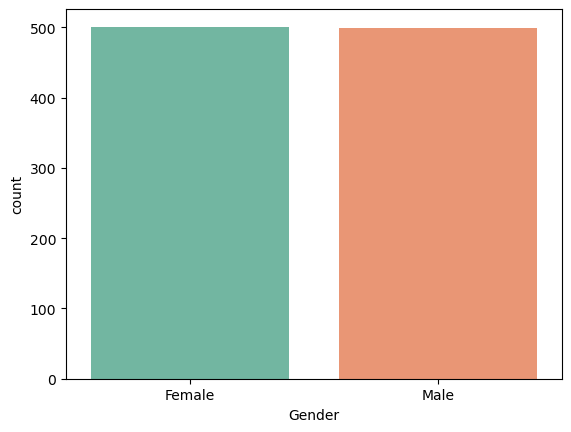

In [32]:
# 23>Determine the predominant gender among customers.
sns.countplot(data=df,x='Gender',palette='Set2')

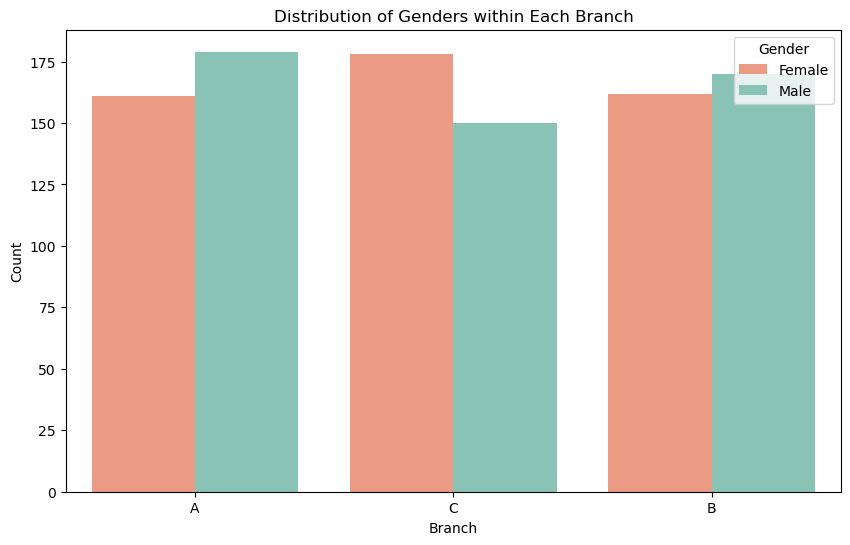

In [36]:
# 24>Examine the distribution of genders within each branch.
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Branch', hue='Gender', palette=["#fc9272","#7fcdbb","#bcbddc","#efedf5","#fee0d2"])
plt.title('Distribution of Genders within Each Branch')
plt.xlabel('Branch')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.savefig('gender.png')
plt.show()


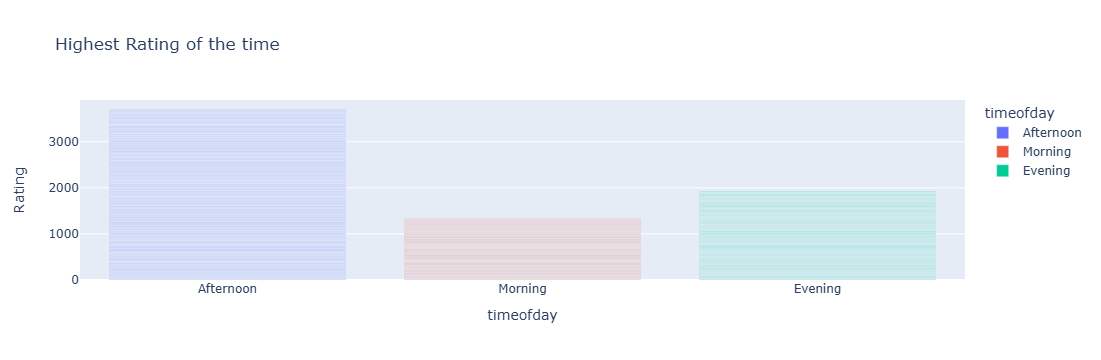

In [37]:
# 25>Identify the time of day when customers provide the most ratings.
fig = px.bar(df, x='timeofday', y='Rating', title='Highest Rating of the time', color='timeofday')
fig.show()

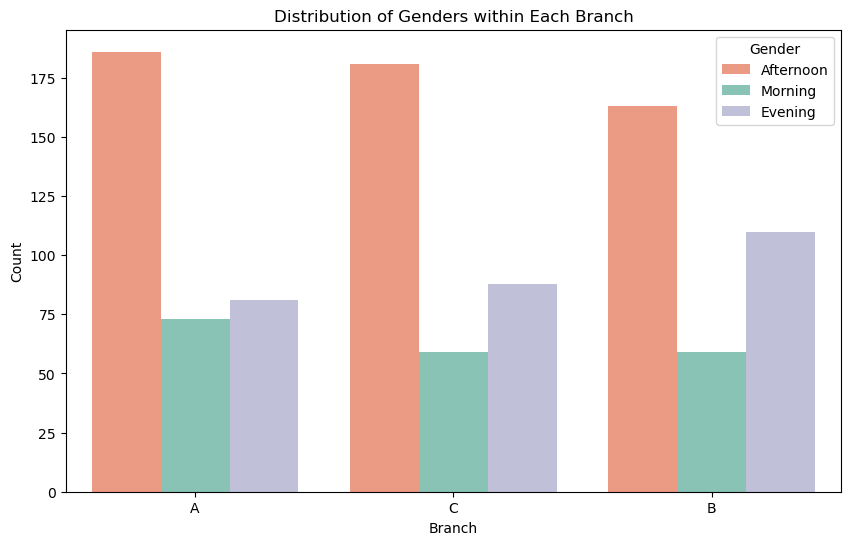

In [38]:
# 26>Determine the time of day with the highest customer ratings for each branch.
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Branch', hue='timeofday', palette=["#fc9272","#7fcdbb","#bcbddc","#efedf5","#fee0d2"])
plt.title('Distribution of Genders within Each Branch')
plt.xlabel('Branch')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.savefig('rating.png')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_9740\2535721471.py:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




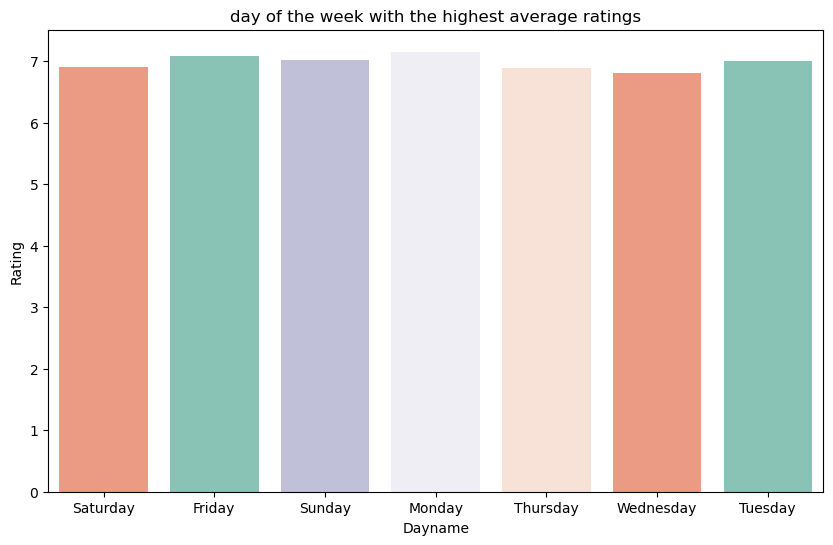

In [39]:
# 27>Identify the day of the week with the highest average ratings.
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='dayname', y='Rating', palette=["#fc9272","#7fcdbb","#bcbddc","#efedf5","#fee0d2"],ci=None)
plt.title('day of the week with the highest average ratings')
plt.xlabel('Dayname')
plt.ylabel('Rating')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_9740\2909199853.py:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




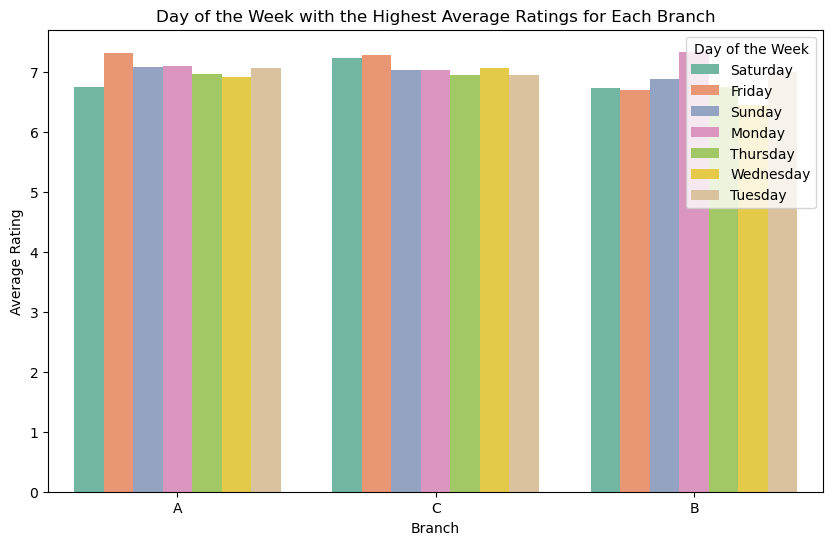

In [40]:
# 28>Determine the day of the week with the highest average ratings for each branch.
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Branch', y='Rating', hue='dayname', palette='Set2',ci=None)
plt.title('Day of the Week with the Highest Average Ratings for Each Branch')
plt.xlabel('Branch')
plt.ylabel('Average Rating')
plt.legend(title='Day of the Week')
plt.savefig('rating_week.png')
plt.show()